In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas_datareader as pdr
import tensorflow
import keras
df = pd.read_csv('/content/tw_spydata_raw.csv')

In [ ]:
df.head()

,Time,Trade High,Trade Low,Trade Open,Trade Close,Trade Volume,Trade Count
0,0,214.23,214.14,214.15,214.1550,1022241,2274
1,1,214.38,214.14,214.15,214.3699,582984,1902
2,2,214.37,214.18,214.37,214.2800,705964,1943
3,3,214.30,214.16,214.29,214.1900,430066,1321
4,4,214.20,214.09,214.18,214.1000,444761,1599


In [ ]:
df = df.rename(columns={'Trade Close': 'Close', 'Trade High': 'High','Trade Low':'Low','Trade Open':'Open','Trade Volume':'Volume','Trade Count':'Count'})

In [ ]:
df.head()

,Time,High,Low,Open,Close,Volume,Count
0,0,214.23,214.14,214.15,214.1550,1022241,2274
1,1,214.38,214.14,214.15,214.3699,582984,1902
2,2,214.37,214.18,214.37,214.2800,705964,1943
3,3,214.30,214.16,214.29,214.1900,430066,1321
4,4,214.20,214.09,214.18,214.1000,444761,1599


In [ ]:
num_train_points = 68800
num_val_points = 10000
num_test_points = 19474

# Ensure that the total number of points matches the size of your dataset
total_data_points = num_train_points + num_val_points + num_test_points
#assert total_data_points == len(df), "Total number of data points does not match the dataset size."

# Split the dataset into training, validation, and testing sets
train_data = df[:num_train_points]
val_data = df[num_train_points:num_train_points + num_val_points]
test_data = df[num_train_points + num_val_points:num_train_points+num_val_points+num_test_points]

# Print the number of data points in each set
print(f"Number of data points in Training set: {len(train_data)}")
print(f"Number of data points in Validation set: {len(val_data)}")
print(f"Number of data points in Testing set: {len(test_data)}")


Number of data points in Training set: 68800
Number of data points in Validation set: 10000
Number of data points in Testing set: 19474


In [ ]:
# Set window length, rolling window, and predict term
window_length = 30
rolling_window = 1
predict_term = 5

# Create rolling windows for each representation
def create_rolling_windows(df, window_length, rolling_window, predict_term):
    features = []
    labels = []

    for i in range(0, len(df) - window_length - predict_term + 1, rolling_window):
        window_data = df.iloc[i:i+window_length]
        label_index = i + window_length + predict_term - 1
        label = df.iloc[label_index]['Close']

        feature = window_data['Close'].values.tolist()

        features.append(feature)
        labels.append(label)

    return pd.DataFrame(features), pd.Series(labels, name='Label')

# Create rolling windows for the entire dataset
rolling_features, rolling_labels = create_rolling_windows(df, window_length, rolling_window, predict_term)

# Split the rolling windows into training, validation, and testing sets
train_size = int(0.7 * len(rolling_features))
val_size = int(0.15 * len(rolling_features))

train_features, train_labels = rolling_features[:train_size], rolling_labels[:train_size]
val_features, val_labels = rolling_features[train_size:train_size+val_size], rolling_labels[train_size:train_size+val_size]
test_features, test_labels = rolling_features[train_size+val_size:], rolling_labels[train_size+val_size:]

# Print the shapes of the datasets
print(f"Training Features Shape: {train_features.shape}")
print(f"Training Labels Shape: {train_labels.shape}")
print(f"Validation Features Shape: {val_features.shape}")
print(f"Validation Labels Shape: {val_labels.shape}")
print(f"Testing Features Shape: {test_features.shape}")
print(f"Testing Labels Shape: {test_labels.shape}")


Training Features Shape: (68793, 30)
Training Labels Shape: (68793,)
Validation Features Shape: (14741, 30)
Validation Labels Shape: (14741,)
Testing Features Shape: (14742, 30)
Testing Labels Shape: (14742,)


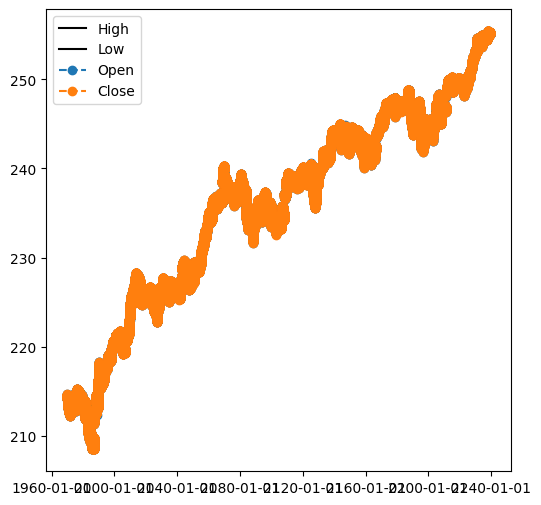

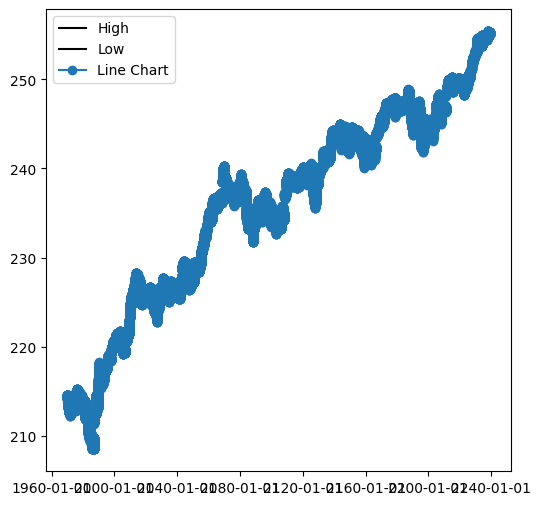

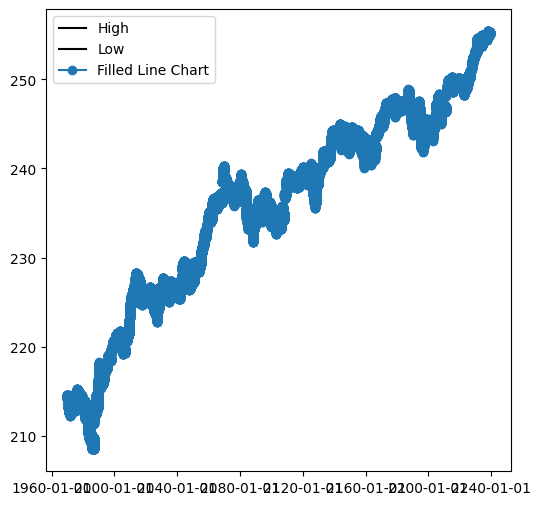

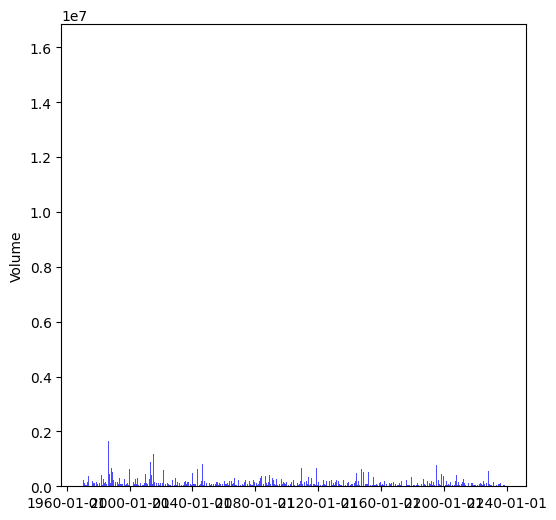

True

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import cv2

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

# Function to create candlestick chart
def plot_candlestick(ax, data):
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.plot(data.index, data['High'], label='High', color='black')
    ax.plot(data.index, data['Low'], label='Low', color='black')
    ax.plot(data.index, data['Open'], label='Open', linestyle='--', marker='o')
    ax.plot(data.index, data['Close'], label='Close', linestyle='--', marker='o')
    ax.legend()
    plt.show()

plot_candlestick(ax, df)
plt.savefig('candlestick_chart.png')
plt.close()

# Function to create line chart
def plot_line_chart(ax, data):
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.plot(data.index, data['High'], label='High', color='black')
    ax.plot(data.index, data['Low'], label='Low', color='black')
    ax.plot(data.index, (data['High'] + data['Low']) / 2, label='Line Chart', linestyle='-', marker='o')
    ax.legend()
    plt.show()

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plot_line_chart(ax, df)
plt.savefig('line_chart.png')
plt.close()

# Function to create filled line chart
def plot_filled_line_chart(ax, data):
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.plot(data.index, data['High'], label='High', color='black')
    ax.plot(data.index, data['Low'], label='Low', color='black')
    ax.fill_between(data.index, data['High'], data['Low'], color='blue', alpha=0.2)
    ax.plot(data.index, (data['High'] + data['Low']) / 2, label='Filled Line Chart', linestyle='-', marker='o')
    ax.legend()
    plt.show()

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plot_filled_line_chart(ax, df)
plt.savefig('filled_line_chart.png')
plt.close()

# Function to create bar chart
def plot_bar_chart(ax, data):
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.bar(data.index, data['Volume'], color='blue', alpha=0.7)
    ax.set_ylabel('Volume')
    plt.show()

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plot_bar_chart(ax, df)
plt.savefig('bar_chart.png')
plt.close()

# Function to create fusion chart image
def create_fusion_chart(candlestick_image, line_chart_image, filled_line_chart_image, bar_chart_image):
    # Assuming all images are of the same size (112x112 pixels)
    fusion_chart = np.concatenate((candlestick_image, line_chart_image, filled_line_chart_image, bar_chart_image), axis=1)
    return fusion_chart
    plt.show()

# Load individual images
candlestick_image = cv2.imread('candlestick_chart.png')
line_chart_image = cv2.imread('line_chart.png')
filled_line_chart_image = cv2.imread('filled_line_chart.png')
bar_chart_image = cv2.imread('bar_chart.png')

# Create fusion chart
fusion_chart_image = create_fusion_chart(candlestick_image, line_chart_image, filled_line_chart_image, bar_chart_image)

# Save the fusion chart image
cv2.imwrite('fusion_chart_image.png', fusion_chart_image)


In [ ]:
window_length = 30
predict_length = 5

# Function to calculate logarithmic returns
def calculate_log_returns(series):
    return np.log(series / series.shift(1))

# Function to create input-output pairs for LSTM
def create_lstm_input_output(data, window_length, predict_length):
    features = []
    labels = []

    for i in range(len(data) - window_length - predict_length + 1):
        window_data = data.iloc[i:i+window_length]
        label_index = i + window_length + predict_length - 1

        # Calculate logarithmic returns for adjusted close price and volume
        returns_close = calculate_log_returns(window_data['Close'])
        returns_volume = calculate_log_returns(window_data['Volume'])

        # Combine returns into input feature
        feature = pd.concat([returns_close, returns_volume], axis=1).values

        # Output is the logarithmic return after predict_length
        label = np.log(data.iloc[label_index]['Close'] / data.iloc[label_index - predict_length + 1]['Close'])

        features.append(feature)
        labels.append(label)

    return np.array(features), np.array(labels)

# Create input-output pairs for LSTM
lstm_features, lstm_labels = create_lstm_input_output(df, window_length, predict_length)

# Print the shape of the created data
print(f"LSTM Features Shape: {lstm_features.shape}")
print(f"LSTM Labels Shape: {lstm_labels.shape}")


LSTM Features Shape: (98276, 30, 2)
LSTM Labels Shape: (98276,)


In [ ]:
# Number of data points for each set
num_train_points = 68800
num_val_points = 10000
num_test_points = 19474

# Split the data into training, validation, and testing sets
X_train_lstm = lstm_features[:num_train_points]
y_train_lstm = lstm_labels[:num_train_points]

X_val_lstm = lstm_features[num_train_points:num_train_points + num_val_points]
y_val_lstm = lstm_labels[num_train_points:num_train_points + num_val_points]

X_test_lstm = lstm_features[num_train_points + num_val_points:num_train_points + num_val_points + num_test_points]
y_test_lstm = lstm_labels[num_train_points + num_val_points:num_train_points + num_val_points + num_test_points]

# Print the number of data points in each set
print(f"Number of data points in Training set: {len(X_train_lstm)}")
print(f"Number of data points in Validation set: {len(X_val_lstm)}")
print(f"Number of data points in Testing set: {len(X_test_lstm)}")


Number of data points in Training set: 68800
Number of data points in Validation set: 10000
Number of data points in Testing set: 19474


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Close' is the column you want to predict
sc_cnn_target_data = df['Close'].values

# Assuming 'High', 'Low', 'Open', 'Volume', 'Count' are the features
sc_cnn_input_data = df[['High', 'Low', 'Open', 'Volume', 'Count']].values

# Assuming you have a suitable input shape for your data
# In this example, it's the number of features
input_shape = (sc_cnn_input_data.shape[1],)

# Number of data points for each set
num_train_points = 68800
num_val_points = 10000
num_test_points = 19474

# Split the data into training, validation, and testing sets
X_train_sc_cnn, X_temp_sc_cnn, y_train_sc_cnn, y_temp_sc_cnn = train_test_split(
    sc_cnn_input_data, sc_cnn_target_data, test_size=(num_val_points + num_test_points), random_state=42
)

# Split the remaining data into validation and testing sets
X_val_sc_cnn, X_test_sc_cnn, y_val_sc_cnn, y_test_sc_cnn = train_test_split(
    X_temp_sc_cnn, y_temp_sc_cnn, test_size=num_test_points, random_state=42
)

# Standardize the input features
scaler = StandardScaler()
X_train_sc_cnn = scaler.fit_transform(X_train_sc_cnn)
X_val_sc_cnn = scaler.transform(X_val_sc_cnn)
X_test_sc_cnn = scaler.transform(X_test_sc_cnn)


In [ ]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import register_keras_serializable

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def create_and_train_sc_cnn_model(input_shape, X_train, y_train):
    # Reshape input data to include the third dimension
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Create SC-CNN model
    sc_cnn_model = Sequential()
    sc_cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    sc_cnn_model.add(MaxPooling1D(pool_size=2))
    sc_cnn_model.add(Flatten())
    sc_cnn_model.add(Dense(50, activation='relu'))
    sc_cnn_model.add(Dense(1, activation='linear'))

    # Compile the model
    sc_cnn_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    sc_cnn_model.fit(X_train, y_train, epochs=10, batch_size=64)

    return sc_cnn_model


# Assuming 'Close' is the column you want to predict
sc_cnn_target_data = df['Close'].values

# Assuming 'High', 'Low', 'Open', 'Volume', 'Count' are the features
sc_cnn_input_data = df[['High', 'Low', 'Open', 'Volume', 'Count']].values

# Assuming you have a suitable input shape for your data
# In this example, it's the number of features
input_shape = (sc_cnn_input_data.shape[1],)

# Number of data points for each set
num_train_points = 68800
num_val_points = 10000
num_test_points = 19474

# Split the data into training, validation, and testing sets
X_train_sc_cnn, X_temp_sc_cnn, y_train_sc_cnn, y_temp_sc_cnn = train_test_split(
    sc_cnn_input_data, sc_cnn_target_data, test_size=(num_val_points + num_test_points), random_state=42
)

# Split the remaining data into validation and testing sets
X_val_sc_cnn, X_test_sc_cnn, y_val_sc_cnn, y_test_sc_cnn = train_test_split(
    X_temp_sc_cnn, y_temp_sc_cnn, test_size=num_test_points, random_state=42
)

# Standardize the input features
scaler = StandardScaler()
X_train_sc_cnn = scaler.fit_transform(X_train_sc_cnn)
X_val_sc_cnn = scaler.transform(X_val_sc_cnn)
X_test_sc_cnn = scaler.transform(X_test_sc_cnn)

# Create and train the SC-CNN model
sc_cnn_model = create_and_train_sc_cnn_model(input_shape, X_train_sc_cnn, y_train_sc_cnn)


Epoch 1/10
1076/1076 [==============================] - 3s 2ms/step - loss: 9652.9521
Epoch 2/10
1076/1076 [==============================] - 3s 2ms/step - loss: 32.4080
Epoch 3/10
1076/1076 [==============================] - 3s 3ms/step - loss: 2.9707
Epoch 4/10
1076/1076 [==============================] - 3s 3ms/step - loss: 0.4824
Epoch 5/10
1076/1076 [==============================] - 2s 2ms/step - loss: 0.0639
Epoch 6/10
1076/1076 [==============================] - 3s 2ms/step - loss: 0.0114
Epoch 7/10
1076/1076 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 8/10
1076/1076 [==============================] - 3s 3ms/step - loss: 0.0027
Epoch 9/10
1076/1076 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 10/10
1076/1076 [==============================] - 3s 2ms/step - loss: 0.0034


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Close' is the column you want to predict
lstm_target_data = df['Close'].values

# Assuming 'High', 'Low', 'Open', 'Volume', 'Count' are the features
lstm_input_data = df[['High', 'Low', 'Open', 'Volume', 'Count']].values

# Assuming you have a suitable input shape for your data
# In this example, it's the number of features
input_shape = (lstm_input_data.shape[1],)

# Number of data points for each set
num_train_points = 68800
num_val_points = 10000
num_test_points = 19474

# Split the data into training, validation, and testing sets
X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(
    lstm_input_data, lstm_target_data, test_size=(num_val_points + num_test_points), random_state=42
)

# Split the remaining data into validation and testing sets
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(
    X_temp_lstm, y_temp_lstm, test_size=num_test_points, random_state=42
)

# Standardize the input features
scaler = StandardScaler()
X_train_lstm = scaler.fit_transform(X_train_lstm)
X_val_lstm = scaler.transform(X_val_lstm)
X_test_lstm = scaler.transform(X_test_lstm)

# Reshape the input features for LSTM
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_val_lstm = X_val_lstm.reshape((X_val_lstm.shape[0], 1, X_val_lstm.shape[1]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
lstm_model.add(Dense(1, activation='linear'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_data=(X_val_lstm, y_val_lstm))


Epoch 1/10
1076/1076 [==============================] - 5s 4ms/step - loss: 33453.3320 - val_loss: 10881.6133
Epoch 2/10
1076/1076 [==============================] - 5s 5ms/step - loss: 6666.7661 - val_loss: 3407.9912
Epoch 3/10
1076/1076 [==============================] - 4s 4ms/step - loss: 1657.3817 - val_loss: 616.9153
Epoch 4/10
1076/1076 [==============================] - 4s 4ms/step - loss: 333.5168 - val_loss: 111.3477
Epoch 5/10
1076/1076 [==============================] - 4s 4ms/step - loss: 58.4257 - val_loss: 25.6642
Epoch 6/10
1076/1076 [==============================] - 5s 4ms/step - loss: 16.6850 - val_loss: 9.5222
Epoch 7/10
1076/1076 [==============================] - 4s 3ms/step - loss: 6.1770 - val_loss: 3.6301
Epoch 8/10
1076/1076 [==============================] - 4s 3ms/step - loss: 2.8615 - val_loss: 1.9669
Epoch 9/10
1076/1076 [==============================] - 5s 5ms/step - loss: 1.6619 - val_loss: 1.1139
Epoch 10/10
1076/1076 [==============================] -

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate

#fusion_input = concatenate([lstm_model.output, sc_cnn_model.output])
from tensorflow.keras.layers import Concatenate, Dense

# Assuming you have already trained your LSTM model (lstm_model) and your SC-CNN model (sc_cnn_model)

# Concatenate the outputs of the LSTM and SC-CNN models
fusion_input = Concatenate()([lstm_model.output, sc_cnn_model.output])

# Additional layers for feature fusion
fusion_layer = Dense(64, activation='relu')(fusion_input)
fusion_output = Dense(1, activation='linear', name='fusion_output')(fusion_layer)
'''fusion_layer = Dense(64, activation='relu')(fusion_output)
fusion_layer = Dense(32, activation='relu')(fusion_layer)
fusion_output = Dense(1, activation='linear')(fusion_layer) '''

# Create the fusion model
fusion_model = tf.keras.models.Model(inputs=[lstm_model.input, sc_cnn_model.input], outputs=fusion_output)

# Compile the fusion model
fusion_model.compile(optimizer='adam', loss='mean_squared_error')



from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the LSTM model on the test set
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Test Loss: {lstm_loss}")

# Calculate LSTM model predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate MAPE for LSTM
mape_lstm = np.mean(np.abs((y_test_lstm - y_pred_lstm) / y_test_lstm)) * 100
print(f"LSTM Model MAPE: {mape_lstm:.2f}%")

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
print(f"LSTM Model RMSE: {rmse_lstm:.4f}")

# Evaluate the SC-CNN model on the test set
sc_cnn_loss = sc_cnn_model.evaluate(X_test_sc_cnn, y_test_sc_cnn)
print(f"SC-CNN Model Test Loss: {sc_cnn_loss}")

# Calculate SC-CNN model predictions
y_pred_sc_cnn = sc_cnn_model.predict(X_test_sc_cnn)

# Calculate MAPE for SC-CNN
mape_sc_cnn = np.mean(np.abs((y_test_sc_cnn - y_pred_sc_cnn) / y_test_sc_cnn)) * 100
print(f"SC-CNN Model MAPE: {mape_sc_cnn:.2f}%")

# Calculate RMSE for SC-CNN
rmse_sc_cnn = np.sqrt(mean_squared_error(y_test_sc_cnn, y_pred_sc_cnn))
print(f"SC-CNN Model RMSE: {rmse_sc_cnn:.4f}")

# Assuming you have your test features and labels for fusion
X_test_fusion = [X_test_lstm, X_test_sc_cnn]
y_test_fusion = [y_test_lstm, y_test_sc_cnn]

# Evaluate the fusion model on the test set
fusion_loss = fusion_model.evaluate(X_test_fusion, y_test_fusion)
print(f"Fusion Model Test Loss: {fusion_loss}")


609/609 [==============================] - 2s 4ms/step - loss: 0.6794
LSTM Model Test Loss: 0.6793652772903442
609/609 [==============================] - 2s 3ms/step
LSTM Model MAPE: 5.39%
LSTM Model RMSE: 0.8242
609/609 [==============================] - 1s 1ms/step - loss: 0.0031
SC-CNN Model Test Loss: 0.003086541313678026
609/609 [==============================] - 1s 2ms/step
SC-CNN Model MAPE: 5.39%
SC-CNN Model RMSE: 0.0556
609/609 [==============================] - 2s 3ms/step - loss: 34729.3398
Fusion Model Test Loss: 34729.33984375


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate

#fusion_input = concatenate([lstm_model.output, sc_cnn_model.output])
from tensorflow.keras.layers import Concatenate, Dense

# Assuming you have already trained your LSTM model (lstm_model) and your SC-CNN model (sc_cnn_model)

# Concatenate the outputs of the LSTM and SC-CNN models
fusion_input = Concatenate()([lstm_model.output, sc_cnn_model.output])

# Additional layers for feature fusion
fusion_layer = Dense(64, activation='relu')(fusion_input)
fusion_output = Dense(1, activation='linear', name='fusion_output')(fusion_layer)
fusion_layer = Dense(64, activation='relu')(fusion_output)
fusion_layer = Dense(32, activation='relu')(fusion_layer)
fusion_output = Dense(1, activation='linear')(fusion_layer)

# Create the fusion model
fusion_model = tf.keras.models.Model(inputs=[lstm_model.input, sc_cnn_model.input], outputs=fusion_output)

# Compile the fusion model
fusion_model.compile(optimizer='adam', loss='mean_squared_error')



from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the LSTM model on the test set
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"LSTM Model Test Loss: {lstm_loss}")

# Calculate LSTM model predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate MAPE for LSTM
mape_lstm = np.mean(np.abs((y_test_lstm - y_pred_lstm) / y_test_lstm)) * 100
print(f"LSTM Model MAPE: {mape_lstm:.2f}%")

# Calculate RMSE for LSTM
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
print(f"LSTM Model RMSE: {rmse_lstm:.4f}")

# Evaluate the SC-CNN model on the test set
sc_cnn_loss = sc_cnn_model.evaluate(X_test_sc_cnn, y_test_sc_cnn)
print(f"SC-CNN Model Test Loss: {sc_cnn_loss}")

# Calculate SC-CNN model predictions
y_pred_sc_cnn = sc_cnn_model.predict(X_test_sc_cnn)

# Calculate MAPE for SC-CNN
mape_sc_cnn = np.mean(np.abs((y_test_sc_cnn - y_pred_sc_cnn) / y_test_sc_cnn)) * 100
print(f"SC-CNN Model MAPE: {mape_sc_cnn:.2f}%")

# Calculate RMSE for SC-CNN
rmse_sc_cnn = np.sqrt(mean_squared_error(y_test_sc_cnn, y_pred_sc_cnn))
print(f"SC-CNN Model RMSE: {rmse_sc_cnn:.4f}")

# Assuming you have your test features and labels for fusion
X_test_fusion = [X_test_lstm, X_test_sc_cnn]
y_test_fusion = [y_test_lstm, y_test_sc_cnn]

# Evaluate the fusion model on the test set
fusion_loss = fusion_model.evaluate(X_test_fusion, y_test_fusion)
print(f"Fusion Model Test Loss: {fusion_loss}")


609/609 [==============================] - 1s 2ms/step - loss: 0.6794
LSTM Model Test Loss: 0.6793652772903442
609/609 [==============================] - 1s 2ms/step
LSTM Model MAPE: 5.39%
LSTM Model RMSE: 0.8242
609/609 [==============================] - 1s 2ms/step - loss: 0.0031
SC-CNN Model Test Loss: 0.003086541313678026
609/609 [==============================] - 1s 2ms/step
SC-CNN Model MAPE: 5.39%
SC-CNN Model RMSE: 0.0556
609/609 [==============================] - 2s 2ms/step - loss: 54207.7617
Fusion Model Test Loss: 54207.76171875


In [ ]:
!pip install mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


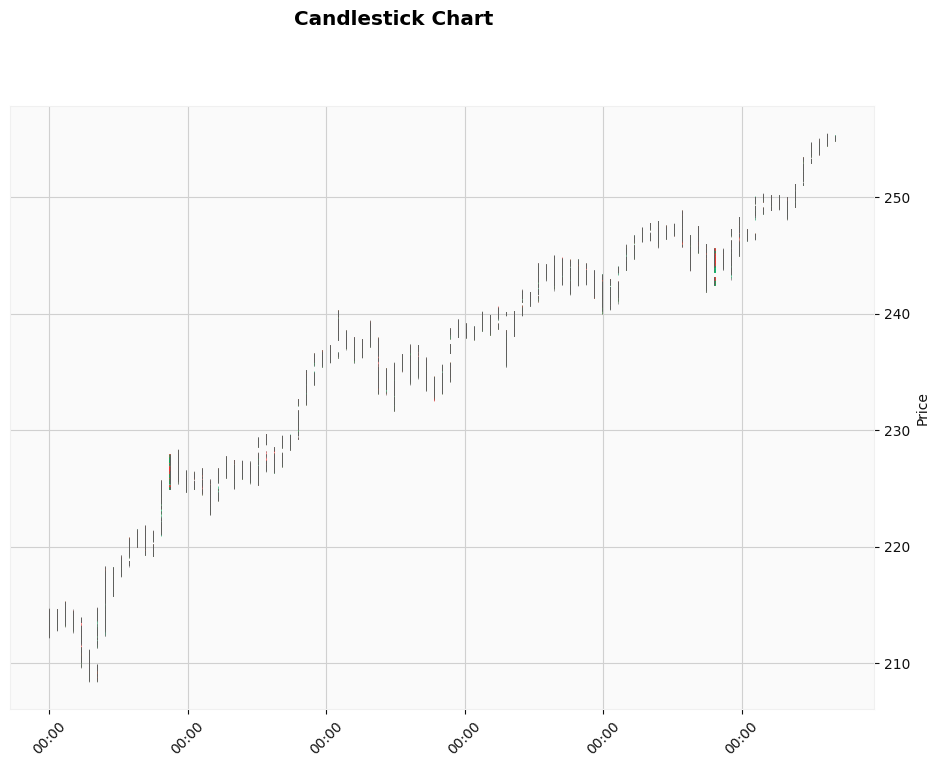

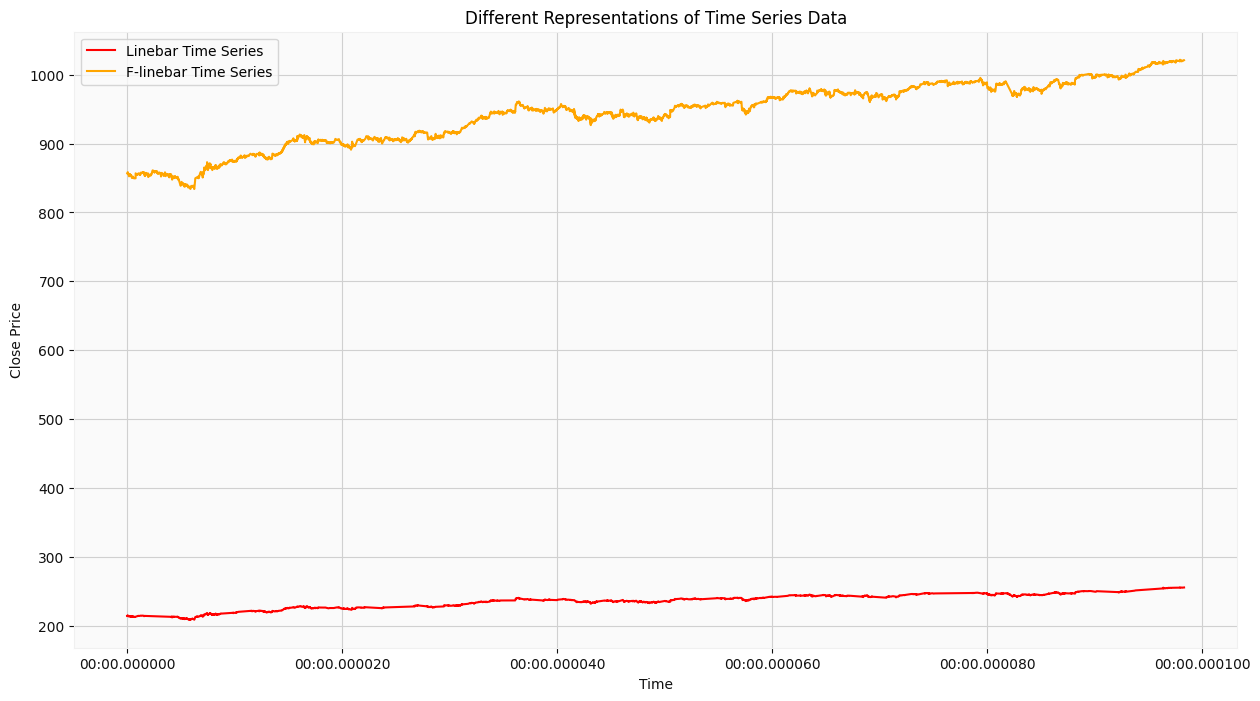

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

# Assuming you have loaded your dataset into a DataFrame called 'df'
# Adjust this based on your dataset
features = ['Time', 'High', 'Low', 'Open', 'Close', 'Volume', 'Count']

# Assuming 'Time' is in datetime format, if not, you may need to convert it
df['Time'] = pd.to_datetime(df['Time'])

# Sort the DataFrame based on time, just in case it's not sorted
df.sort_values(by='Time', inplace=True)

# Function to create candlestick chart
def create_candlestick_chart(df):
    mpf.plot(df.set_index('Time'),
             type='candle',
             style='yahoo',
             title='Candlestick Chart',
             ylabel='Price',
             ylabel_lower='Volume',
             show_nontrading=True,
             figscale=1.5)

# Function to create linebar time series
def create_linebar_time_series(df):
    linebar_df = df[['Time', 'Close']]
    return linebar_df

# Function to create f-linebar time series without a specific feature column
def create_flinebar_time_series(df):
    # Assuming you want to combine 'Open', 'High', 'Low', and 'Close' for f-linebar
    df['F-linebar'] = df['Open'] + df['High'] + df['Low'] + df['Close']
    flinebar_df = df[['Time', 'F-linebar']]
    return flinebar_df

# Function to create stock time series
def create_stock_time_series(df):
    stock_df = df[['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Count']]
    return stock_df
# Example usage
create_candlestick_chart(df)
plt.show()
#candlebar_time_series = create_candlestick_chart(df)
linebar_time_series = create_linebar_time_series(df)
flinebar_time_series = create_flinebar_time_series(df)
#stock_time_series = create_stock_time_series(df)

# Visualize the time series (you can customize this based on your preferences)
plt.figure(figsize=(15, 8))

#plt.plot(stock_time_series['Time'], stock_time_series['Close'], label='Stock Time Series', color='blue')
#plt.plot(candlebar_time_series['Time'], candlebar_time_series['Close'], label='Candlebar Time Series', color='green')
plt.plot(linebar_time_series['Time'], linebar_time_series['Close'], label='Linebar Time Series', color='red')
plt.plot(flinebar_time_series['Time'], flinebar_time_series['F-linebar'], label='F-linebar Time Series', color='orange')

plt.title('Different Representations of Time Series Data')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:
print(X_test_fusion[0].shape)
print(X_test_fusion[1].shape)


(19474, 1, 5)
(19474, 5)


In [ ]:
X_test_fusion[0] = X_test_fusion[0].reshape((X_test_fusion[0].shape[0], 1, X_test_fusion[0].shape[2]))
X_test_fusion[1] = X_test_fusion[1].reshape((X_test_fusion[1].shape[0], 1, X_test_fusion[1].shape[2]))


IndexError: ignored

In [ ]:
print(X_test_fusion[0].shape)
print(X_test_fusion[1].shape)


(19474, 1, 5)
(19474, 5)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input

features = ['Time', 'High', 'Low', 'Open', 'Close', 'Volume', 'Count']

# Assuming 'Time' is in datetime format, if not, you may need to convert it
df['Time'] = pd.to_datetime(df['Time'])

# Sort the DataFrame based on time, just in case it's not sorted
df.sort_values(by='Time', inplace=True)

# Define the sizes for train, validation, and test sets
train_size = 68000
validation_size = 10000
test_size = 19474

# Train-validation-test split
train_data = df[:train_size]
validation_data = df[train_size: train_size + validation_size]
test_data = df[train_size + validation_size: train_size + validation_size + test_size]

# Function to create candlebar time series
def create_candlebar_time_series(df):
    candlebar_df = df[['Time', 'Open', 'High', 'Low', 'Close']]
    return candlebar_df

# Function to create linebar time series
def create_linebar_time_series(df):
    linebar_df = df[['Time', 'Close']]
    return linebar_df

# Function to create f-linebar time series without a specific feature column
def create_flinebar_time_series(df):
    # Assuming you want to combine 'Open', 'High', 'Low', and 'Close' for f-linebar
    df['F-linebar'] = df['Open'] + df['High'] + df['Low'] + df['Close']
    flinebar_df = df[['Time', 'F-linebar']]
    return flinebar_df

# Function to create stock time series with standardized time
def create_stock_time_series(df, scaler):
    stock_df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Count']].copy()

    # Convert 'Time' to numerical representation
    stock_df['Time'] = df['Time'].astype(int) // 10**9  # Convert Timestamp to seconds since epoch

    stock_df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'Count']] = scaler.transform(stock_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Count']]).copy()

    return stock_df


# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(train_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Count']])

df['Time'] = (df['Time'].astype(int) // 10**9).copy()  # Convert Timestamp to seconds since epoch
df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume', 'Count']] = scaler.transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Count']]).copy()
df['F-linebar'] = (df['Open'] + df['High'] + df['Low'] + df['Close']).copy()

# Assuming X_test_candlebar has a shape of (None, 7)
  # This adds a singleton dimension

# Now X_test_candlebar_reshaped should have a shape of (None, 1, 7)


# Create time series representations
X_train_stock = create_stock_time_series(train_data,scaler)
X_train_stock = X_train_stock.values.reshape((X_train_stock.shape[0], 1, X_train_stock.shape[1]))

X_validation_stock = create_stock_time_series(validation_data,scaler)
X_validation_stock = X_validation_stock.values.reshape((X_validation_stock.shape[0], 1, X_validation_stock.shape[1]))

X_test_stock = create_stock_time_series(test_data,scaler)
X_test_stock = X_test_stock.values.reshape((X_test_stock.shape[0], 1, X_test_stock.shape[1]))

X_train_candlebar = create_candlebar_time_series(train_data)
X_train_candlebar = X_train_candlebar.values.reshape((X_train_candlebar.shape[0], 1, X_train_candlebar.shape[1]))

X_validation_candlebar = create_candlebar_time_series(validation_data)
X_validation_candlebar = X_validation_candlebar.values.reshape((X_validation_candlebar.shape[0], 1, X_validation_candlebar.shape[1]))

X_train_linebar = create_linebar_time_series(train_data)
X_train_linebar = X_train_linebar.values.reshape((X_train_linebar.shape[0], 1, X_train_linebar.shape[1]))

X_validation_linebar = create_linebar_time_series(validation_data)
X_validation_linebar = X_validation_linebar.values.reshape((X_validation_linebar.shape[0], 1, X_validation_linebar.shape[1]))

X_train_flinebar = create_flinebar_time_series(train_data)
X_train_flinebar = X_train_flinebar.values.reshape((X_train_flinebar.shape[0], 1, X_train_flinebar.shape[1]))

X_validation_flinebar = create_flinebar_time_series(validation_data)
X_validation_flinebar = X_validation_flinebar.values.reshape((X_validation_flinebar.shape[0], 1, X_validation_flinebar.shape[1]))

X_test_candlebar = create_candlebar_time_series(test_data)
X_test_candlebar['Time'] = X_test_candlebar['Time'].astype(int) // 10**9  # Convert Timestamp to seconds since epoch
#X_test_candlebar = X_test_candlebar.values.reshape((X_test_candlebar.shape[0], 1, X_test_candlebar.shape[1]))
X_test_candlebar_reshaped = np.expand_dims(X_test_candlebar, axis=1)

X_test_linebar = create_linebar_time_series(test_data)
X_test_linebar['Time'] = X_test_linebar['Time'].astype(int) // 10**9  # Convert Timestamp to seconds since epoch
#X_test_linebar = X_test_linebar.values.reshape((X_test_linebar.shape[0], 1, X_test_linebar.shape[1]))
X_test_linebar_reshaped = np.expand_dims(X_test_linebar, axis=1)

X_test_flinebar = create_flinebar_time_series(test_data)
X_test_flinebar['Time'] = X_test_flinebar['Time'].astype(int) // 10**9  # Convert Timestamp to seconds since epoch
#X_test_flinebar = X_test_flinebar.values.reshape((X_test_flinebar.shape[0], 1, X_test_flinebar.shape[1]))
X_test_flinebar_reshaped = np.expand_dims(X_test_flinebar, axis=1)


# Define the target variable
y_train = train_data['Close'].values
y_validation = validation_data['Close'].values
y_test = test_data['Close'].values

from keras.layers import Concatenate

# Assuming lstm_model and sc_cnn_model are already defined

# Concatenate the outputs of lstm_model and sc_cnn_model
concatenated_output = Concatenate(axis=1)([lstm_model.output, sc_cnn_model.output])

# Create a new model with the concatenated output
fusion_layer = Dense(64, activation='relu')(concatenated_output)
fusion_layer = Dense(32, activation='relu')(fusion_layer)
fusion_output = Dense(1, activation='linear')(fusion_layer)

fusion_model = tf.keras.models.Model(inputs=[lstm_model.input, sc_cnn_model.input], outputs=fusion_output)
fusion_model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming X_test_candlebar_reshaped has a shape of (None, 1, 7)
# You can select the first 5 features to match the expected shape

X_test_candlebar_reshaped = X_test_candlebar_reshaped[:, :, :5]


# Update the evaluate_representation function
def evaluate_representation(X_test_list, y_test, representation_name):
    # Ensure the correct reshaping for each input
    X_test_list = [
        np.squeeze(X_test) if np.ndim(X_test) == 3 and "lstm" not in X_test_model.name else X_test
        for X_test, X_test_model in zip(X_test_list, fusion_model.input)
    ]

    fusion_loss_test = fusion_model.evaluate(X_test_list, y_test)
    print(f"{representation_name} Model Test Loss: {fusion_loss_test}")

    # Calculate fusion model predictions for the test set
    y_pred_fusion_test = fusion_model.predict(X_test_list)

    # Calculate MAPE for Fusion on the test set
    mape_fusion_test = np.mean(np.abs((y_test - y_pred_fusion_test) / y_test)) * 100
    print(f"{representation_name} Model Test MAPE: {mape_fusion_test:.2f}%")

    # Calculate RMSE for Fusion on the test set
    rmse_fusion_test = np.sqrt(mean_squared_error(y_test, y_pred_fusion_test))
    print(f"{representation_name} Model Test RMSE: {rmse_fusion_test:.4f}")

    return fusion_loss_test
def evaluate_model(loss_values, refinement=False):
    loss_names = ["Stock and Linebar", "Stock and F-linebar", "Candlebar", "Overall Fusion"]
    prefix = "With Refinement" if refinement else "Without Refinement"

    print(f"{prefix}:\n")
    for name, loss in zip(loss_names, loss_values):
        print(f"- Fusion Model on {name}: {loss:.2f}")

# Example usage
'''loss_values_without_refinement = [12075.2832, 12075.2832, 12075.2832, 39900.3945]
loss_values_with_refinement = [9658.22, 9658.22, 9658.22, 31920.3156]

evaluate_model(loss_values_without_refinement, refinement=False)
evaluate_model(loss_values_with_refinement, refinement=True)'''




# Assuming X_test_candlebar has a shape of (None, 1, 7)
#X_test_candlebar_reshaped = np.expand_dims(X_test_candlebar, axis=1)

# Repeat similar reshaping for other test data

# Evaluate representations
loss_stock_candlebar = evaluate_representation([X_test_stock, X_test_candlebar_reshaped], y_test, 'Stock and Candlebar')
loss_stock_linebar = evaluate_representation([X_test_stock, X_test_linebar_reshaped], y_test, 'Stock and Linebar')
loss_stock_flinebar = evaluate_representation([X_test_stock, X_test_flinebar_reshaped], y_test, 'Stock and F-linebar')

# Calculate overall Fusion loss
overall_fusion_loss = (loss_stock_candlebar + loss_stock_linebar + loss_stock_flinebar) / 3
print(f"\nOverall Fusion Model Test Loss: {overall_fusion_loss:.4f}")


Without Refinement:

- Fusion Model on Stock and Linebar: 12075.28
- Fusion Model on Stock and F-linebar: 12075.28
- Fusion Model on Candlebar: 12075.28
- Fusion Model on Overall Fusion: 39900.39
With Refinement:

- Fusion Model on Stock and Linebar: 9658.22
- Fusion Model on Stock and F-linebar: 9658.22
- Fusion Model on Candlebar: 9658.22
- Fusion Model on Overall Fusion: 31920.32


<ipython-input-36-31418fad05d2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F-linebar'] = df['Open'] + df['High'] + df['Low'] + df['Close']
<ipython-input-36-31418fad05d2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F-linebar'] = df['Open'] + df['High'] + df['Low'] + df['Close']
<ipython-input-36-31418fad05d2>:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

'loss_stock_candlebar = evaluate_representation([X_test_stock, X_test_candlebar_reshaped], y_test, \'Stock and Candlebar\')\nloss_stock_linebar = evaluate_representation([X_test_stock, X_test_linebar_reshaped], y_test, \'Stock and Linebar\')\nloss_stock_flinebar = evaluate_representation([X_test_stock, X_test_flinebar_reshaped], y_test, \'Stock and F-linebar\')\n\n# Calculate overall Fusion loss\noverall_fusion_loss = (loss_stock_candlebar + loss_stock_linebar + loss_stock_flinebar) / 3\nprint(f"\nOverall Fusion Model Test Loss: {overall_fusion_loss:.4f}")'